<a href="https://colab.research.google.com/github/pumpzcc/EvolutionaryDeepLearning/blob/main/EDL_8_1_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and other setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.callbacks import EarlyStopping

from IPython import display
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
plt.gray()

<Figure size 640x480 with 0 Axes>

CONSTANTS

Load Fashion Data

In [2]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# split dataset
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype("float32") / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Setup class names and labels for visualization, not training

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Plot some images.

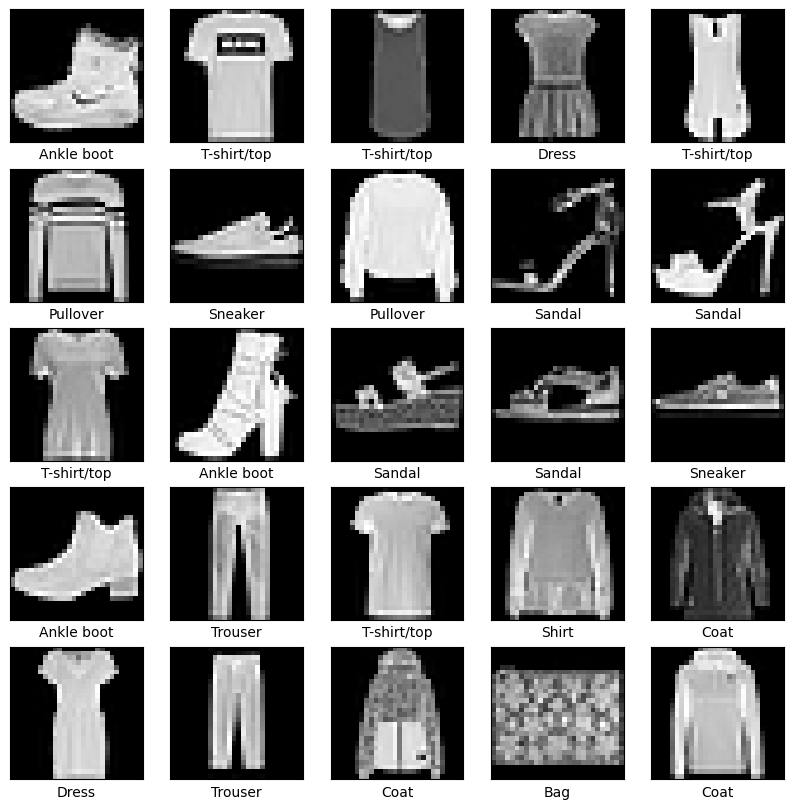

In [4]:
import math

def plot_data(num_images, images, labels):
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i].reshape(28,28))
      plt.xlabel(class_names[labels[i]])
  plt.show()

plot_data(25, train_images, train_labels)


STAGE 1: Auto-encoders

Build the Encoder

In [5]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = layers.MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = layers.MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = layers.MaxPool2D( (2, 2), padding='same')(encoded_layer3)

Build the Decoder

In [6]:
#decoding architecture
decoded_layer1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = layers.UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = layers.UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = layers.Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = layers.UpSampling2D((2, 2))(decoded_layer3)
#output layer
output_layer   = layers.Conv2D(1, (3, 3), padding='same')(decoded_layer3)

Build the Model

In [7]:
# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,761 (194.38 KB)

 Trainable params: 49,761 (194.38 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_loss = []
history_val_loss = []

def add_history(history):
  history_loss.append(history.history["loss"])
  history_val_loss.append(history.history["val_loss"])

def reset_history():
  global history_loss
  global history_val_loss
  history_loss = []
  history_val_loss = []
  return []

def plot_results(num_images, images, labels, history):
  add_history(history)
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i].reshape(28,28))
      plt.xlabel(class_names[labels[i]])
  plt.show()
  plt.plot(history_loss, label='loss')
  plt.plot(history_val_loss, label='val_loss')
  plt.legend()
  plt.show()

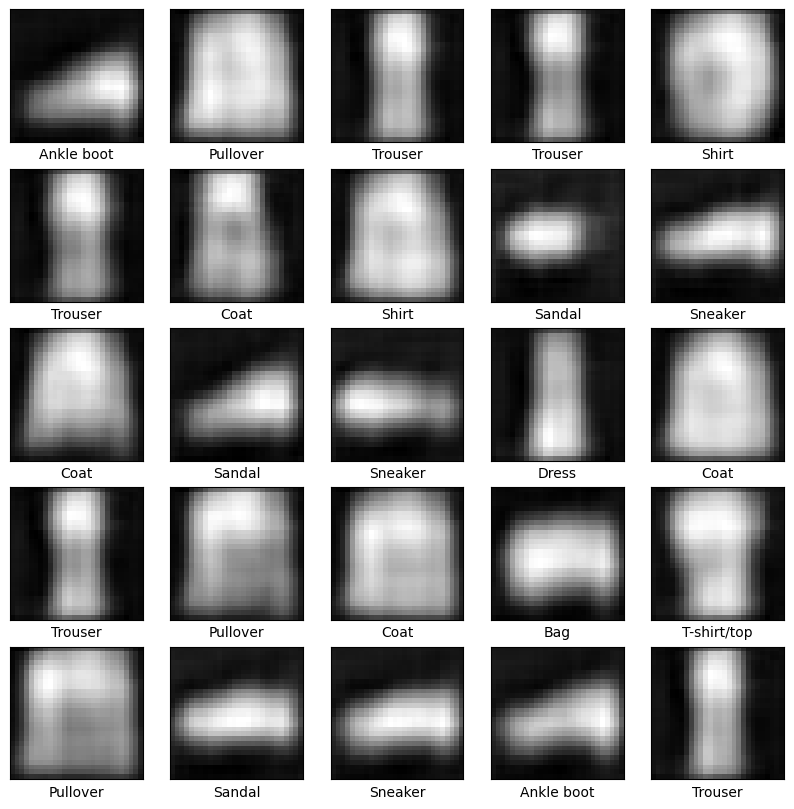

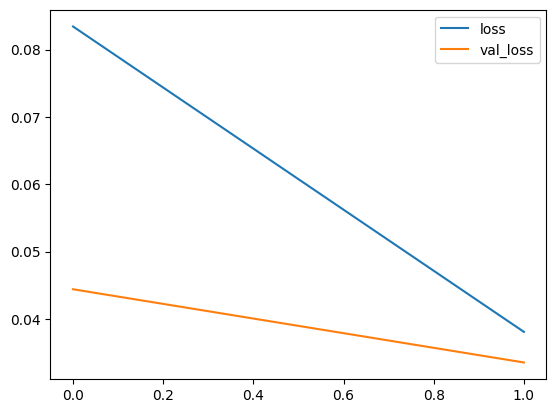

In [ ]:
EPOCHS = 10
history = reset_history()

for i in range(EPOCHS):
  history = model.fit(train_images, train_images, epochs=1, batch_size=2048, validation_data=(test_images, test_images))
  pred_images = model.predict(test_images[:25])
  clear_output()
  plot_results(25, pred_images[:25], test_labels[:25], history)

# Improving the Autoendoer

In [ ]:
# input layer
inputs = layers.Input(shape=(28, 28 ,1))

x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
encoded = layers.MaxPool2D()(x)

# Decoder
x = layers.Conv2DTranspose(64, 3,activation='relu',strides=(2,2))(encoded)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2DTranspose(32, 3, activation='relu',strides=(2,2), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2DTranspose(32, 3, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
decoded = layers.Conv2DTranspose(1, 3, activation='sigmoid',strides=(2,2), padding='same')(x)

# compile the model
model = Model(inputs, decoded)
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model)

In [ ]:
EPOCHS = 10
history = reset_history()

for i in range(EPOCHS):
  history = model.fit(train_images, train_images, epochs=1, batch_size=2048, validation_data=(test_images, test_images))
  pred_images = model.predict(test_images[:25])
  clear_output()
  plot_results(25, pred_images[:25], test_labels[:25], history)

In [ ]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
#x = layers.BatchNormalization()(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.MaxPool2D( (2, 2), padding='same')(x)
#x = layers.Dropout(0.5)(x)

#decoding architecture
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = layers.Dropout(0.5)(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
#x = layers.Dropout(0.5)(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.BatchNormalization()(x)
#output layer
output_layer   = layers.Conv2D(1, (3, 3), padding='same')(x)

# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model)

In [ ]:
EPOCHS = 10
history = reset_history()

for i in range(EPOCHS):
  history = model.fit(train_images, train_images, epochs=1, batch_size=2048, validation_data=(test_images, test_images))
  pred_images = model.predict(test_images[:25])
  clear_output()
  plot_results(25, pred_images[:25], test_labels[:25], history)